In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 병합

In [2]:
def merge_data(news_data, price_data, groupby):
    '''
    news_data : 뉴스데이터로, 'year','month'(또는 'week'), 'name_top_topic', '언론사' 포함
    price_data : 부동산 가격으로, 'year','month'(또는 'week') 포함
    groupby : 'month' 또는 'week'
    '''
    # 뉴스데이터 토픽
    group_news_data = news_data.groupby(['year',groupby])[ 'name_top_topic'].value_counts()
    group_news_data.name = None
    group_news_data = group_news_data.unstack('name_top_topic')
    group_news_data.columns = ['topic_count_'+str(cnt) for cnt in group_news_data.columns]
    group_news_data.reset_index(inplace=True)
    
    # 뉴스데이터 언론사
    group_press_data = news_data.groupby(['year',groupby])['언론사'].value_counts()
    group_press_data.name = None
    group_press_data = group_press_data.unstack('언론사')
    group_press_data.columns = ['press_'+str(cnt) for cnt in group_press_data.columns]
    group_press_data.reset_index(inplace=True)

    # 데이터 병합
    data = pd.merge(
        pd.merge(group_news_data,price_data, on=['year', groupby],how='left'),
        group_press_data, on=['year', groupby],how='left')
    data.set_index(['year', groupby], inplace=True)
    return data

In [3]:
path_raw_data = '../data/target/'
file_list = os.listdir(path_raw_data)
file_list

['target_아파트_매매_month.csv',
 'target_아파트_매매_week.csv',
 'target_아파트_월세_month.csv',
 'target_아파트_월세_week.csv',
 'target_아파트_전세_month.csv',
 'target_아파트_전세_week.csv',
 'target_연립다세대_매매_month.csv',
 'target_연립다세대_매매_week.csv',
 'target_연립다세대_월세_month.csv',
 'target_연립다세대_월세_week.csv',
 'target_연립다세대_전세_month.csv',
 'target_연립다세대_전세_week.csv',
 'target_오피스텔_매매_month.csv',
 'target_오피스텔_매매_week.csv',
 'target_오피스텔_월세_month.csv',
 'target_오피스텔_월세_week.csv',
 'target_오피스텔_전세_month.csv',
 'target_오피스텔_전세_week.csv']

In [4]:
news_data = pd.read_pickle('../data/news/topic_data.pkl')

n=1
price_data = pd.read_csv(path_raw_data + file_list[n], index_col=0)

data = merge_data(news_data, price_data, groupby='week').fillna(0)

print(data.shape)
data.head()

(369, 93)


topic_count_0.0  topic_count_1.0  topic_count_2.0  topic_count_3.0  \
year week                                                                       
2013 1                 130               60              104               47   
     35                 14               21                8                8   
     36                351              465              170              101   
     37                250              399              153               90   
     38                111              168               95               59   

           topic_count_4.0  topic_count_5.0  topic_count_6.0  topic_count_7.0  \
year week                                                                       
2013 1                 226               64               44              123   
     35                  9               38               16               17   
     36                560              290              149              215   
     37                362              241              142              258   
     38                186              168              106              150   

           month   pct_송파구  ...  press_중앙일보  press_충북일보  press_충청일보  \
year week                   ...                                       
2013 1      12.0  0.022323  ...         6.0         6.0         3.0   
     35      9.0  0.000000  ...         0.0         3.0         4.0   
     36      9.0  0.186058  ...        35.0        44.0        25.0   
     37      9.0 -0.034999  ...        25.0        19.0        10.0   
     38      9.0 -0.012988  ...        11.0        11.0         9.0   

           press_충청투데이  press_파이낸셜뉴스  press_한겨레  press_한국경제  press_한국일보  \
year week                                                                 
2013 1            22.0          64.0       17.0        57.0        14.0   
     35            0.0          22.0        2.0        16.0         2.0   
     36           85.0         190.0       35.0       218.0        31.0   
     37           57.0         181.0       22.0       198.0        38.0   
     38           23.0         122.0       10.0        94.0        15.0   

           press_한라일보  press_헤럴드경제  
year week                           
2013 1            2.0         52.0  
     35           0.0          4.0  
     36           6.0        153.0  
     37           9.0        160.0  
     38           2.0         64.0  

[5 rows x 93 columns]

# 모델링

In [5]:
data.columns

Index(['topic_count_0.0', 'topic_count_1.0', 'topic_count_2.0',
       'topic_count_3.0', 'topic_count_4.0', 'topic_count_5.0',
       'topic_count_6.0', 'topic_count_7.0', 'month', 'pct_송파구', 'pct_노원구',
       'pct_성북구', 'pct_영등포구', 'pct_강서구', 'pct_강북구', 'pct_동대문구', 'pct_마포구',
       'pct_구로구', 'pct_관악구', 'pct_양천구', 'pct_도봉구', 'pct_서초구', 'pct_은평구',
       'pct_성동구', 'pct_동작구', 'pct_중구', 'pct_종로구', 'pct_중랑구', 'pct_서대문구',
       'pct_강남구', 'pct_금천구', 'pct_용산구', 'pct_광진구', 'pct_강동구', 'pct_동남권',
       'pct_동북권', 'pct_서남권', 'pct_서북권', 'pct_도심권', 'press_KBS', 'press_MBC',
       'press_OBS', 'press_SBS', 'press_YTN', 'press_강원도민일보', 'press_강원일보',
       'press_경기일보', 'press_경남도민일보', 'press_경남신문', 'press_경상일보', 'press_경인일보',
       'press_경향신문', 'press_광주매일신문', 'press_광주일보', 'press_국민일보', 'press_국제신문',
       'press_내일신문', 'press_대구일보', 'press_대전일보', 'press_동아일보', 'press_디지털타임스',
       'press_매일경제', 'press_매일신문', 'press_머니투데이', 'press_무등일보', 'press_문화일보',
       'press_부산일보', 'press_서울경제',

In [6]:
total_y = data[['pct_동남권', 'pct_동북권', 'pct_서남권', 'pct_서북권', 'pct_도심권']]
X = data[['topic_count_0.0', 'topic_count_1.0', 'topic_count_2.0', 'topic_count_3.0',
          'topic_count_4.0', 'topic_count_5.0',   'topic_count_6.0', 'topic_count_7.0',
          # 언론사
          # 'press_KBS', 'press_MBC', 'press_OBS', 'press_SBS', 'press_YTN', 'press_강원도민일보', 'press_강원일보',
          # 'press_경기일보', 'press_경남도민일보', 'press_경남신문', 'press_경상일보', 'press_경인일보', 'press_경향신문',
          # 'press_광주매일신문', 'press_광주일보', 'press_국민일보', 'press_국제신문', 'press_내일신문', 'press_대구일보',
          # 'press_대전일보', 'press_디지털타임스', 'press_매일경제', 'press_매일신문', 'press_머니투데이', 'press_무등일보',
          # 'press_문화일보', 'press_부산일보', 'press_서울경제', 'press_서울신문', 'press_세계일보', 'press_아시아경제',
          # 'press_아주경제', 'press_영남일보', 'press_울산매일', 'press_전남일보', 'press_전북도민일보', 'press_전북일보',
          # 'press_전자신문', 'press_제민일보', 'press_중도일보', 'press_중부매일', 'press_중부일보', 'press_중앙일보',
          # 'press_충북일보', 'press_충청일보', 'press_충청투데이', 'press_파이낸셜뉴스', 'press_한겨레',
          # 'press_한국경제', 'press_한국일보', 'press_한라일보', 'press_헤럴드경제'
         ]]

In [8]:
X = X.div(X.sum(axis=1),axis=0) #합이 1이 되도록

In [9]:
y = total_y['pct_동남권'].apply(lambda cnt : 1 if(cnt>0) else 0).astype('category')
y[:5]

year  week
2013  1       0
      35      0
      36      0
      37      1
      38      0
Name: pct_동남권, dtype: category
Categories (2, int64): [0, 1]

In [10]:
y.value_counts()

1    191
0    178
Name: pct_동남권, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

## 로지스틱

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logistic_model = LogisticRegression(random_state=2020)

In [17]:
logistic_model.fit(X_train,y_train)

LogisticRegression(random_state=2020)

In [18]:
y_pred = logistic_model.predict(X_test)

In [19]:
report = classification_report(y_test,y_pred)
matirx = confusion_matrix(y_test, y_pred)
print(report)
print('------------------')
print(matirx)
print('------------------')
print("F1 : %.3f" % f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.09      0.16        55
           1       0.51      0.93      0.66        56

    accuracy                           0.51       111
   macro avg       0.53      0.51      0.41       111
weighted avg       0.53      0.51      0.41       111

------------------
[[ 5 50]
 [ 4 52]]
------------------
F1 : 0.658


In [20]:
logistic_model.coef_

array([[ 0.03911256,  0.39540368,  0.36530469,  0.24444006,  0.33401868,
        -0.42323218,  0.05185776, -1.00691481]])

In [21]:
logistic_model.predict_proba(X_test)

array([[0.46427681, 0.53572319],
       [0.46751614, 0.53248386],
       [0.46608148, 0.53391852],
       [0.4762745 , 0.5237255 ],
       [0.47564326, 0.52435674],
       [0.47651044, 0.52348956],
       [0.46777354, 0.53222646],
       [0.47012286, 0.52987714],
       [0.45085575, 0.54914425],
       [0.48845909, 0.51154091],
       [0.46269969, 0.53730031],
       [0.47326225, 0.52673775],
       [0.46149345, 0.53850655],
       [0.46668196, 0.53331804],
       [0.48770912, 0.51229088],
       [0.4635573 , 0.5364427 ],
       [0.46684155, 0.53315845],
       [0.47892545, 0.52107455],
       [0.44961491, 0.55038509],
       [0.46166874, 0.53833126],
       [0.47162738, 0.52837262],
       [0.48682015, 0.51317985],
       [0.45571893, 0.54428107],
       [0.46580469, 0.53419531],
       [0.50618645, 0.49381355],
       [0.45799418, 0.54200582],
       [0.46241313, 0.53758687],
       [0.46747868, 0.53252132],
       [0.47645919, 0.52354081],
       [0.46239195, 0.53760805],
       [0.

## xgboost

 incremental Learning 가능

In [22]:
from xgboost import XGBClassifier, plot_importance

In [23]:
xgb_rg = XGBClassifier()

In [24]:
xgb_params = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 2],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 5, 6]
}

grid_xgb = GridSearchCV(xgb_rg, param_grid=xgb_params,
                        cv=5, scoring='f1')

evals = [(X_test, y_test)]
grid_xgb.fit(X_train, y_train, eval_set=evals)
grid_xgb.best_estimator_

[0]	validation_0-error:0.54955
[1]	validation_0-error:0.423423
[2]	validation_0-error:0.459459
[3]	validation_0-error:0.423423
[4]	validation_0-error:0.477477
[5]	validation_0-error:0.504505
[6]	validation_0-error:0.504505
[7]	validation_0-error:0.504505
[8]	validation_0-error:0.477477
[9]	validation_0-error:0.468468
[10]	validation_0-error:0.432432
[11]	validation_0-error:0.414414
[12]	validation_0-error:0.423423
[13]	validation_0-error:0.432432
[14]	validation_0-error:0.432432
[15]	validation_0-error:0.441441
[16]	validation_0-error:0.432432
[17]	validation_0-error:0.414414
[18]	validation_0-error:0.423423
[19]	validation_0-error:0.414414
[20]	validation_0-error:0.405405
[21]	validation_0-error:0.405405
[22]	validation_0-error:0.414414
[23]	validation_0-error:0.405405
[24]	validation_0-error:0.405405
[25]	validation_0-error:0.459459
[26]	validation_0-error:0.45045
[27]	validation_0-error:0.45045
[28]	validation_0-error:0.45045
[29]	validation_0-error:0.468468
[30]	validation_0-error:

[48]	validation_0-error:0.513514
[49]	validation_0-error:0.522523
[50]	validation_0-error:0.504505
[51]	validation_0-error:0.513514
[52]	validation_0-error:0.495495
[53]	validation_0-error:0.513514
[54]	validation_0-error:0.495495
[55]	validation_0-error:0.513514
[56]	validation_0-error:0.504505
[57]	validation_0-error:0.513514
[58]	validation_0-error:0.504505
[59]	validation_0-error:0.531532
[60]	validation_0-error:0.513514
[61]	validation_0-error:0.522523
[62]	validation_0-error:0.513514
[63]	validation_0-error:0.513514
[64]	validation_0-error:0.513514
[65]	validation_0-error:0.540541
[66]	validation_0-error:0.522523
[67]	validation_0-error:0.513514
[68]	validation_0-error:0.504505
[69]	validation_0-error:0.495495
[70]	validation_0-error:0.486486
[71]	validation_0-error:0.477477
[72]	validation_0-error:0.486486
[73]	validation_0-error:0.495495
[74]	validation_0-error:0.513514
[75]	validation_0-error:0.504505
[76]	validation_0-error:0.504505
[77]	validation_0-error:0.495495
[78]	valid

[94]	validation_0-error:0.486486
[95]	validation_0-error:0.486486
[96]	validation_0-error:0.486486
[97]	validation_0-error:0.486486
[98]	validation_0-error:0.477477
[99]	validation_0-error:0.486486
[100]	validation_0-error:0.477477
[101]	validation_0-error:0.468468
[102]	validation_0-error:0.468468
[103]	validation_0-error:0.468468
[104]	validation_0-error:0.459459
[105]	validation_0-error:0.459459
[106]	validation_0-error:0.459459
[107]	validation_0-error:0.459459
[108]	validation_0-error:0.477477
[109]	validation_0-error:0.468468
[110]	validation_0-error:0.468468
[111]	validation_0-error:0.468468
[112]	validation_0-error:0.468468
[113]	validation_0-error:0.459459
[114]	validation_0-error:0.459459
[115]	validation_0-error:0.459459
[116]	validation_0-error:0.477477
[117]	validation_0-error:0.468468
[118]	validation_0-error:0.477477
[119]	validation_0-error:0.477477
[120]	validation_0-error:0.486486
[121]	validation_0-error:0.468468
[122]	validation_0-error:0.486486
[123]	validation_0-e

[140]	validation_0-error:0.495495
[141]	validation_0-error:0.504505
[142]	validation_0-error:0.513514
[143]	validation_0-error:0.513514
[144]	validation_0-error:0.504505
[145]	validation_0-error:0.504505
[146]	validation_0-error:0.486486
[147]	validation_0-error:0.486486
[148]	validation_0-error:0.495495
[149]	validation_0-error:0.486486
[150]	validation_0-error:0.495495
[151]	validation_0-error:0.486486
[152]	validation_0-error:0.486486
[153]	validation_0-error:0.486486
[154]	validation_0-error:0.486486
[155]	validation_0-error:0.495495
[156]	validation_0-error:0.504505
[157]	validation_0-error:0.486486
[158]	validation_0-error:0.495495
[159]	validation_0-error:0.486486
[160]	validation_0-error:0.477477
[161]	validation_0-error:0.477477
[162]	validation_0-error:0.468468
[163]	validation_0-error:0.477477
[164]	validation_0-error:0.495495
[165]	validation_0-error:0.486486
[166]	validation_0-error:0.477477
[167]	validation_0-error:0.486486
[168]	validation_0-error:0.486486
[169]	validati

[185]	validation_0-error:0.504505
[186]	validation_0-error:0.504505
[187]	validation_0-error:0.504505
[188]	validation_0-error:0.504505
[189]	validation_0-error:0.504505
[190]	validation_0-error:0.504505
[191]	validation_0-error:0.504505
[192]	validation_0-error:0.495495
[193]	validation_0-error:0.504505
[194]	validation_0-error:0.504505
[195]	validation_0-error:0.504505
[196]	validation_0-error:0.504505
[197]	validation_0-error:0.504505
[198]	validation_0-error:0.504505
[199]	validation_0-error:0.504505
[0]	validation_0-error:0.477477
[1]	validation_0-error:0.432432
[2]	validation_0-error:0.45045
[3]	validation_0-error:0.45045
[4]	validation_0-error:0.468468
[5]	validation_0-error:0.477477
[6]	validation_0-error:0.495495
[7]	validation_0-error:0.468468
[8]	validation_0-error:0.441441
[9]	validation_0-error:0.441441
[10]	validation_0-error:0.387387
[11]	validation_0-error:0.396396
[12]	validation_0-error:0.396396
[13]	validation_0-error:0.414414
[14]	validation_0-error:0.432432
[15]	va

KeyboardInterrupt: 

In [28]:
xgb_model = XGBClassifier(colsample_bytree=0.8, gamma=5, learning_rate=0.05,
                          n_estimators=200, subsample=1.0)
score = cross_val_score(xgb_model, X_train, y_train, scoring='f1')
score.mean()

0.6423019750533425

In [29]:
xgb_model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.8, gamma=5, learning_rate=0.05,
              n_estimators=200, subsample=1.0)

In [30]:
report = classification_report(y_test,y_pred)
matirx = confusion_matrix(y_test, y_pred)
print(report)
print('------------------')
print(matirx)
print('------------------')
print("F1 : %.3f" % f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.09      0.16        55
           1       0.51      0.93      0.66        56

    accuracy                           0.51       111
   macro avg       0.53      0.51      0.41       111
weighted avg       0.53      0.51      0.41       111

------------------
[[ 5 50]
 [ 4 52]]
------------------
F1 : 0.658


In [31]:
xgb_model.predict_proba(X_test)

array([[0.45801783, 0.5419822 ],
       [0.42518055, 0.57481945],
       [0.5363234 , 0.46367654],
       [0.39693022, 0.6030698 ],
       [0.4527732 , 0.5472268 ],
       [0.42581236, 0.57418764],
       [0.43597382, 0.5640262 ],
       [0.44464988, 0.5553501 ],
       [0.34756202, 0.652438  ],
       [0.44907528, 0.5509247 ],
       [0.44995683, 0.55004317],
       [0.5435848 , 0.45641518],
       [0.48111618, 0.5188838 ],
       [0.45801783, 0.5419822 ],
       [0.43331367, 0.56668633],
       [0.52287495, 0.47712502],
       [0.4660356 , 0.5339644 ],
       [0.4582376 , 0.5417624 ],
       [0.5171476 , 0.4828524 ],
       [0.45801783, 0.5419822 ],
       [0.4332257 , 0.5667743 ],
       [0.3335688 , 0.6664312 ],
       [0.45617127, 0.5438287 ],
       [0.49605918, 0.5039408 ],
       [0.68692267, 0.31307733],
       [0.45801783, 0.5419822 ],
       [0.45801783, 0.5419822 ],
       [0.491929  , 0.508071  ],
       [0.47282767, 0.5271723 ],
       [0.42518055, 0.57481945],
       [0.

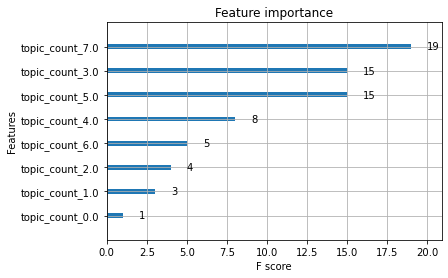

In [32]:
plot_importance(xgb_model)
plt.show()

## catboost

In [33]:
from catboost import CatBoostClassifier

In [34]:
cat_model = CatBoostClassifier(n_estimators = 1000, learning_rate =0.05)

In [35]:
cat_model.fit(X_train,y_train)

0:	learn: 0.6831028	total: 114ms	remaining: 1m 53s
1:	learn: 0.6771622	total: 117ms	remaining: 58.2s
2:	learn: 0.6710913	total: 119ms	remaining: 39.5s
3:	learn: 0.6611871	total: 121ms	remaining: 30.1s
4:	learn: 0.6491881	total: 123ms	remaining: 24.5s
5:	learn: 0.6402091	total: 125ms	remaining: 20.7s
6:	learn: 0.6324195	total: 127ms	remaining: 18s
7:	learn: 0.6243306	total: 129ms	remaining: 16s
8:	learn: 0.6193941	total: 132ms	remaining: 14.5s
9:	learn: 0.6149837	total: 133ms	remaining: 13.2s
10:	learn: 0.6076196	total: 135ms	remaining: 12.2s
11:	learn: 0.6012103	total: 137ms	remaining: 11.3s
12:	learn: 0.5917600	total: 138ms	remaining: 10.5s
13:	learn: 0.5872027	total: 140ms	remaining: 9.89s
14:	learn: 0.5812116	total: 142ms	remaining: 9.32s
15:	learn: 0.5775596	total: 143ms	remaining: 8.8s
16:	learn: 0.5717280	total: 145ms	remaining: 8.4s
17:	learn: 0.5681799	total: 147ms	remaining: 8s
18:	learn: 0.5634598	total: 148ms	remaining: 7.63s
19:	learn: 0.5589179	total: 149ms	remaining: 7.3s

233:	learn: 0.1036320	total: 423ms	remaining: 1.38s
234:	learn: 0.1030541	total: 424ms	remaining: 1.38s
235:	learn: 0.1021665	total: 426ms	remaining: 1.38s
236:	learn: 0.1013691	total: 427ms	remaining: 1.37s
237:	learn: 0.1007269	total: 428ms	remaining: 1.37s
238:	learn: 0.1000458	total: 429ms	remaining: 1.36s
239:	learn: 0.0993092	total: 431ms	remaining: 1.36s
240:	learn: 0.0984467	total: 432ms	remaining: 1.36s
241:	learn: 0.0976502	total: 434ms	remaining: 1.36s
242:	learn: 0.0970189	total: 435ms	remaining: 1.36s
243:	learn: 0.0964990	total: 437ms	remaining: 1.35s
244:	learn: 0.0955572	total: 439ms	remaining: 1.35s
245:	learn: 0.0949075	total: 440ms	remaining: 1.35s
246:	learn: 0.0940388	total: 441ms	remaining: 1.34s
247:	learn: 0.0932351	total: 443ms	remaining: 1.34s
248:	learn: 0.0926820	total: 444ms	remaining: 1.34s
249:	learn: 0.0919026	total: 445ms	remaining: 1.34s
250:	learn: 0.0914157	total: 447ms	remaining: 1.33s
251:	learn: 0.0909853	total: 448ms	remaining: 1.33s
252:	learn: 

409:	learn: 0.0432618	total: 637ms	remaining: 916ms
410:	learn: 0.0431400	total: 638ms	remaining: 914ms
411:	learn: 0.0429267	total: 639ms	remaining: 912ms
412:	learn: 0.0427147	total: 640ms	remaining: 910ms
413:	learn: 0.0425460	total: 641ms	remaining: 908ms
414:	learn: 0.0423230	total: 642ms	remaining: 906ms
415:	learn: 0.0421945	total: 643ms	remaining: 903ms
416:	learn: 0.0420470	total: 645ms	remaining: 902ms
417:	learn: 0.0419032	total: 647ms	remaining: 900ms
418:	learn: 0.0417548	total: 648ms	remaining: 899ms
419:	learn: 0.0415919	total: 650ms	remaining: 898ms
420:	learn: 0.0413473	total: 652ms	remaining: 896ms
421:	learn: 0.0412227	total: 653ms	remaining: 894ms
422:	learn: 0.0409275	total: 654ms	remaining: 892ms
423:	learn: 0.0408801	total: 655ms	remaining: 890ms
424:	learn: 0.0407075	total: 656ms	remaining: 888ms
425:	learn: 0.0406227	total: 657ms	remaining: 886ms
426:	learn: 0.0404345	total: 659ms	remaining: 884ms
427:	learn: 0.0402751	total: 660ms	remaining: 882ms
428:	learn: 

632:	learn: 0.0229494	total: 906ms	remaining: 525ms
633:	learn: 0.0229242	total: 907ms	remaining: 524ms
634:	learn: 0.0228811	total: 908ms	remaining: 522ms
635:	learn: 0.0228305	total: 910ms	remaining: 521ms
636:	learn: 0.0227886	total: 911ms	remaining: 519ms
637:	learn: 0.0227494	total: 912ms	remaining: 517ms
638:	learn: 0.0227222	total: 913ms	remaining: 516ms
639:	learn: 0.0226921	total: 914ms	remaining: 514ms
640:	learn: 0.0226556	total: 915ms	remaining: 512ms
641:	learn: 0.0226128	total: 917ms	remaining: 511ms
642:	learn: 0.0225789	total: 918ms	remaining: 510ms
643:	learn: 0.0225348	total: 920ms	remaining: 508ms
644:	learn: 0.0224992	total: 921ms	remaining: 507ms
645:	learn: 0.0224638	total: 922ms	remaining: 505ms
646:	learn: 0.0224360	total: 924ms	remaining: 504ms
647:	learn: 0.0224060	total: 925ms	remaining: 503ms
648:	learn: 0.0223733	total: 926ms	remaining: 501ms
649:	learn: 0.0223129	total: 928ms	remaining: 500ms
650:	learn: 0.0222830	total: 929ms	remaining: 498ms
651:	learn: 

807:	learn: 0.0175715	total: 1.11s	remaining: 265ms
808:	learn: 0.0175440	total: 1.12s	remaining: 264ms
809:	learn: 0.0175188	total: 1.12s	remaining: 262ms
810:	learn: 0.0174819	total: 1.12s	remaining: 261ms
811:	learn: 0.0174580	total: 1.12s	remaining: 259ms
812:	learn: 0.0174503	total: 1.12s	remaining: 258ms
813:	learn: 0.0174328	total: 1.12s	remaining: 257ms
814:	learn: 0.0174132	total: 1.12s	remaining: 255ms
815:	learn: 0.0173808	total: 1.12s	remaining: 254ms
816:	learn: 0.0173674	total: 1.13s	remaining: 252ms
817:	learn: 0.0173467	total: 1.13s	remaining: 251ms
818:	learn: 0.0173048	total: 1.13s	remaining: 250ms
819:	learn: 0.0172755	total: 1.13s	remaining: 248ms
820:	learn: 0.0172474	total: 1.13s	remaining: 247ms
821:	learn: 0.0172195	total: 1.13s	remaining: 246ms
822:	learn: 0.0171816	total: 1.14s	remaining: 244ms
823:	learn: 0.0171617	total: 1.14s	remaining: 243ms
824:	learn: 0.0171278	total: 1.14s	remaining: 241ms
825:	learn: 0.0171136	total: 1.14s	remaining: 240ms
826:	learn: 

In [36]:
pred_y = cat_model.predict(X_test)

In [37]:
report = classification_report(y_test,y_pred)
matirx = confusion_matrix(y_test, y_pred)
print(report)
print('------------------')
print(matirx)
print('------------------')
print("F1 : %.3f" % f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.09      0.16        55
           1       0.51      0.93      0.66        56

    accuracy                           0.51       111
   macro avg       0.53      0.51      0.41       111
weighted avg       0.53      0.51      0.41       111

------------------
[[ 5 50]
 [ 4 52]]
------------------
F1 : 0.658
